# Imports
### Used Libraries:
<p>
    <ul>
        <li>$numpy$</li>
        <li>$pandas$</li>
        <li>$matplotlib$</li>
    </ul>
</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Reading the CSV file

In [2]:
df=pd.read_csv('CBL_Modelling_Data_Capstone_cut1.csv')

# Giving column name to index column

Naming unnamed column as <b>'ID'</b>

In [3]:
df=df.rename(columns={'Unnamed: 0':'ID'})

### Total rows in Dataframe

In [4]:
no_of_rows=df.shape[0]
no_of_rows

111792

### Total columns in Dataframe

In [5]:
no_of_columns=df.shape[1]
no_of_columns

358

# Dropping all duplicate columns

  <b>drop_duplicates</b> removes the duplicates rows, so to remove duplicate columns, it can be converted to its transpose from and remove duplicates and then transpose again to get back to its original shape

In [6]:
df2 = df.T.drop_duplicates().T

# Saving all removed dupilcates columns data to new csv file
<p>
    Saving all removed duplicates data into <b>data.csv</b> file
</p>

In [7]:
df2.to_csv(r'C:\drive\self_training_projects\project_1\data.csv',header=True, index=False)

# Reading removed duplicated file
<p>
    Reading <b>data.csv</b> file
</p>

In [8]:
df = pd.read_csv('data.csv')

### Total columns after removing duplicate columns

In [9]:
no_of_columns=df.shape[1]
no_of_columns

247

# Accessing all columns and the count of null values which has at least $1$ null value in its respective column
<p>
    <b>nan_counts</b> is the dictionary which stores :
        <ul>
            <li>its <b>keys</b> as column names which has at least $1$ null value. </li>
            <li>its <b>values</b> as number of null values in their corresponding column. </li>
        </ul>
</p>

In [10]:
nan_counts = df[[i for i in df.columns if df[i].isna().any()]].isna().sum().to_dict()

# Calculating the percentage of null values in its respective column

In [11]:
per = []
for key, value in nan_counts.items():
    per.append((value / df.shape[0]) * 100)

# Plotting columns and number of null values corresponding to it
<p>
    Line $4$-$8$ code was written to represent the null value percentage on each bar to their corresponding column
</p>

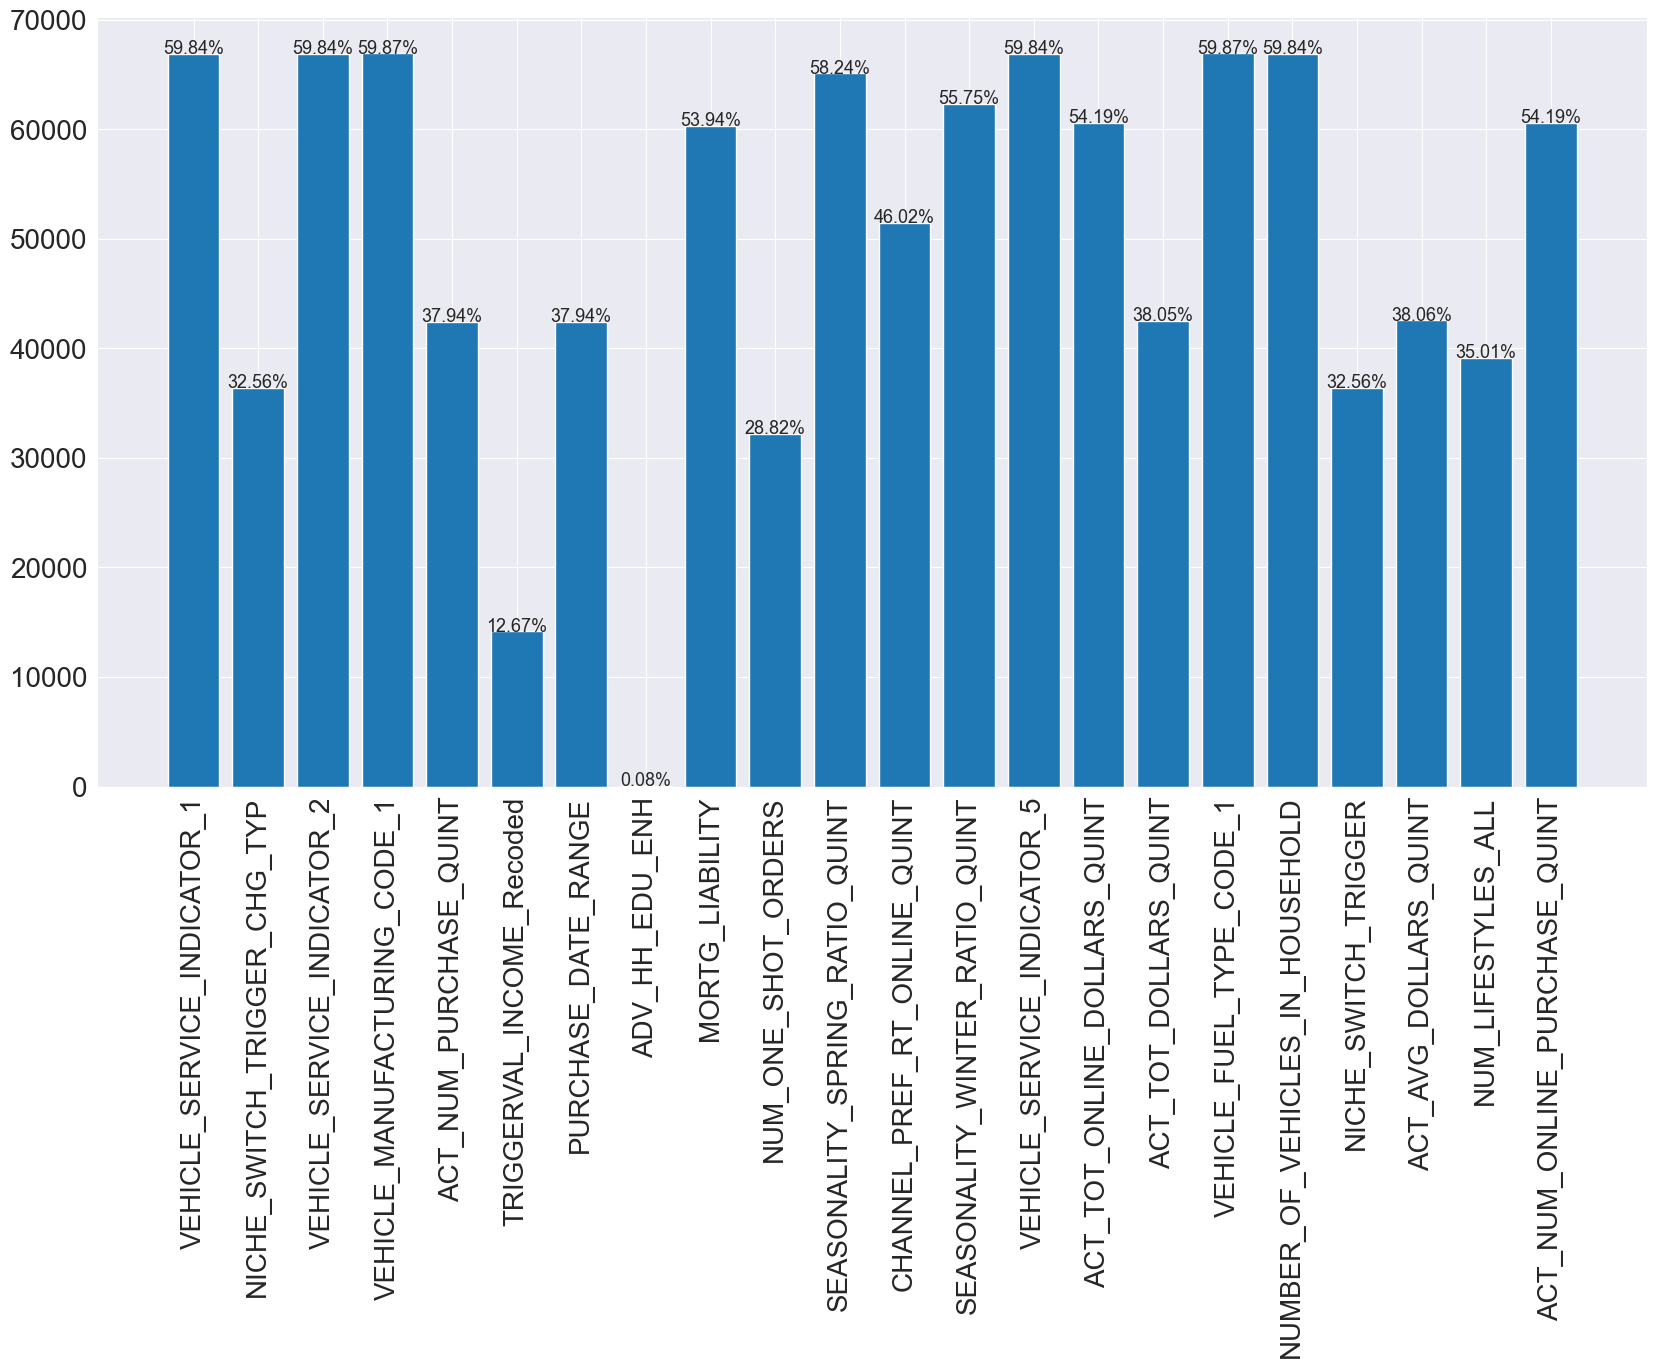

In [12]:
plt.figure(figsize=(20, 10))
ax = plt.bar(nan_counts.keys(), nan_counts.values())
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + .05
    plt.annotate('{:.2f}%'.format(per[i]), (x, y), ha='center',fontsize=13)
plt.show()

# Columns which has more than $50\%$ of null values
<p>
    <b>gt50nan</b> stores the names of columns which has more than $50\%$ of null values in it
</p>

In [13]:
gt50nan = [i for i in df.columns if df[i].isna().sum() >= (df.shape[0] / 2)]

# Dropping all columns with more than $50\%$ of null values

In [14]:
for col in gt50nan:
    df.drop(col, axis=1, inplace=True)

# Dropping rows where the corresponding column has null value
<p>
    Column <b>'ADV_HH_EDU_ENH'</b> has only $0.08\%$ which is $84$ values, so which we can remove null values corresponding rows since $84<<111792$
</p>

In [15]:
df = df[df['ADV_HH_EDU_ENH'].notna()]

### Total rows after removing the null values corresponding row

In [16]:
no_of_rows=df.shape[0]
no_of_rows

111708

# Accessing all columns and the count of null values which has at least $1$ null value in its respective column
<p>
    <b>nan_counts</b> is the dictionary which stores :
        <ul>
            <li>its <b>keys</b> as column names which has at least $1$ null value. </li>
            <li>its <b>values</b> as number of null values in their corresponding column. </li>
        </ul>
</p>

In [17]:
nan_counts = df[[i for i in df.columns if df[i].isna().any()]].isna().sum().to_dict()

# Calculating the percentage of null values of each column

In [18]:
per = []
for key, value in nan_counts.items():
    per.append((value / df.shape[0]) * 100)

# Plotting columns and number of null values corresponding to it
<p>
    Line $4$-$8$ code was written to represent the null value percentage on each bar to their corresponding column
</p>

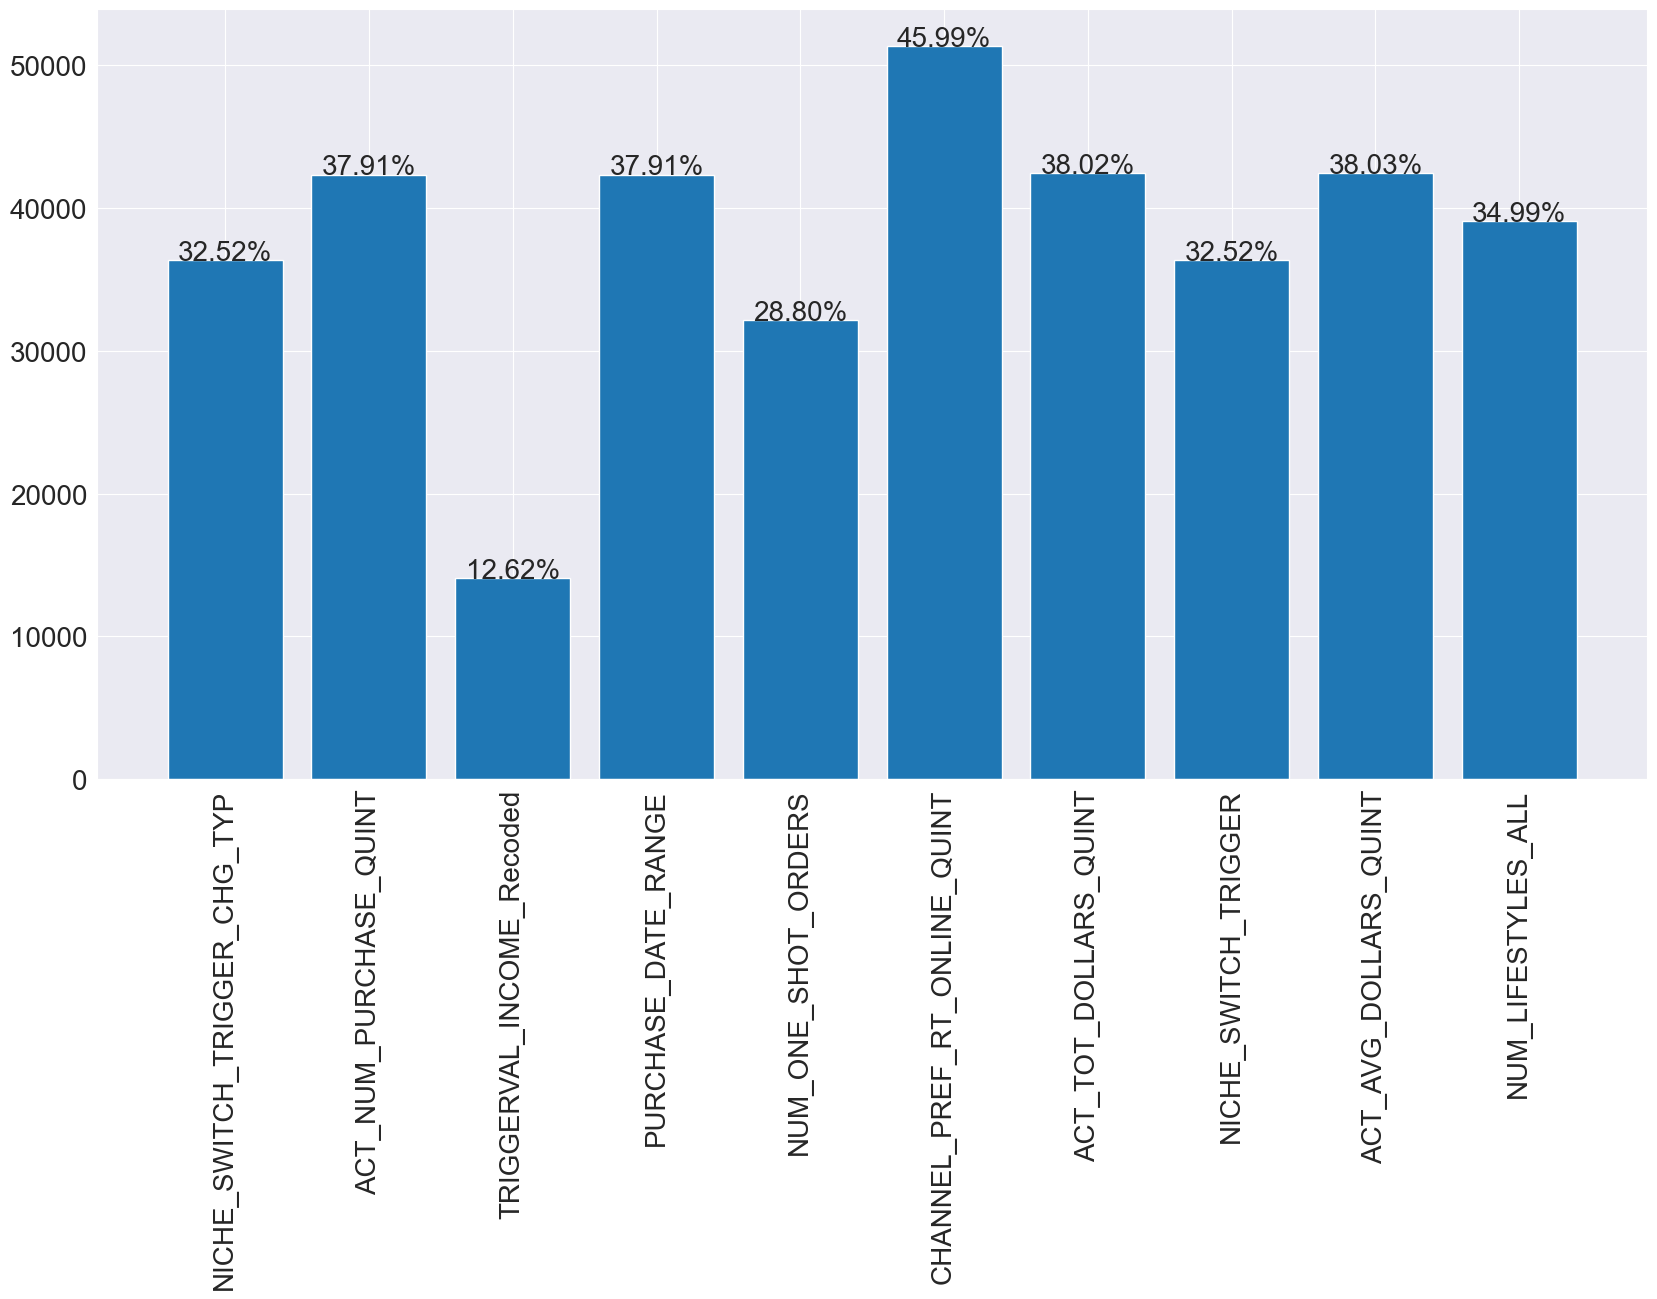

In [19]:
plt.figure(figsize=(20, 10))
ax = plt.bar(nan_counts.keys(), nan_counts.values())
plt.xticks(rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + .05
    plt.annotate('{:.2f}%'.format(per[i]), (x, y), ha='center',fontsize=20)
plt.show()

# Finding correlation matrix of each column
<ul>
    <li><b>corr_matrix</b> is correlation matrix which stores the correlation values for every column</li>
    <li><b>upper</b> is the upper triangular matrix of corr_matrix</li>
</ul>


In [20]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# List of all columns which has $>0.7$ correlation
<b>drop_list</b> stores the names of columns which has correlation higher than 0.7

In [21]:
drop_list = [column for column in upper.columns if any(upper[column] > 0.7)]

# Dropping all columns which has $>0.7$ correlation

In [22]:
df.drop(drop_list, axis=1, inplace=True)

# List of all Column names with dtype object with $0$ null values
<b>obj_0nan</b> stores the names of columns which has data type <b>object</b> and which do not have any null values

In [23]:
obj_0nan = [i for i in df.columns if
            df[i].dtype == object and ~df[i].isna().any()]

# List of all Column names with dtype object without $0$ null values
<b>obj_not0nan</b> stores the names of columns which has data type <b>object</b> and which have null values

In [24]:
obj_not0nan = [i for i in df.columns if
               df[i].dtype == object and df[i].isna().any()]

# List of all Column names with dtype int or float with $0$ null values
<b>nonobj_0nan</b> stores the names of columns which has data type <b>int</b> or <b>float</b> and which do not have any null values

In [25]:
nonobj_0nan = [i for i in df.columns if df[i].dtype != object and ~df[
    i].isna().any()]

# List of all Column names with dtype int or float without $0$ null values
<b>nonobj_0nan</b> stores the names of columns which has data type <b>int</b> or <b>float</b> and which have any null values

In [26]:
nonobj_not0nan = [i for i in df.columns if df[i].dtype != object and df[
    i].isna().any()]

# Replacing all non-object null values with $0.0$
<p>null values can be replaced not only with $0.0$ but can also be replaced with mean, median, mode and any aggregate function based on the feature</p>

In [27]:
df[nonobj_not0nan] = df[nonobj_not0nan].replace(np.nan, 0.0)
# df[nonobj_not0nan]

# Encoding all object values which its column has $0$ null values
<ul>
    <li>
        Since number of unique values under each column is $<10$ hence encoded with integers $0$ - $7$.
    </li>
    <li>
        <b>OneHotEnocoder</b> or <b>LabelEncoder</b> can also be used for encoding.
    </li>
</ul>

In [28]:
df[obj_0nan] = df[obj_0nan].replace(['H', 'S'], [1, 2])
df[obj_0nan] = df[obj_0nan].replace(['Some College', 'High School', 'College', 'Some High School or Less',
                                     'Graduate School'], [1, 2, 3, 4, 5])
df[obj_0nan] = df[obj_0nan].replace(['Single', 'Multiple with <5 surnames without apt. #', 'Not Available',
                                     'Multiple with 5-9 surnames without apt. #',
                                     'Multiple with 5-9 surnames with apt. #',
                                     'Multiple with <5 surnames with apt. #',
                                     'Multiple with 10+ surnames with apt. #',
                                     'Multiple with 10+ surnames without apt. #'], [1, 2, 0, 4, 5, 3, 6, 7])

# Encoding all object values which its column do not have $0$ null values
<ul>
    <li>All alphabet characters are encoded with integers $1$-$26$ and null values are replaced with $0$</li>
    <li><b>OneHotEnocoder</b> or <b>LabelEncoder</b> can also be used for encoding.</li>
</ul>

In [29]:
mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8, "I": 9, "J": 10, "K": 11, "L": 12, "M": 13,
           "N": 14, "O": 15, "P": 16, "Q": 17, "R": 18, "S": 19, "T": 20, "U": 21, "V": 22, "W": 23, "X": 24, "Y": 25,
           "Z": 26}
df[obj_not0nan] = df[obj_not0nan].replace(mapping)
df[obj_not0nan] = df[obj_not0nan].replace(np.nan, 0)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111708 entries, 0 to 111791
Columns: 204 entries, ID to Y
dtypes: float64(7), int64(197)
memory usage: 174.7 MB


# Accessing all columns except id column
Making a copy of dataframe except $1^{st}$ column

In [31]:
df1 = df.iloc[:, 1:]

# Normalizing all columns except id column
<ul>
    <li><b>normalized_df</b> is a dataframe which is normalized between $0$ - $1$ except <b>id</b></li>
    <li>can also be used L2 normalization</li>
    <li>not only normalization but standardization can also be used</li>
    <li>making a copy of orginal dataframe <b>df</b> to <b>df3</b></li>
</ul>

In [32]:
normalized_df = (df1 - df1.min()) / (df1.max() - df1.min())
df3 = df.copy()
df3.iloc[:, 1:] = normalized_df

# Normalized dataframe

In [33]:
df3

,ID,MT_RETAILER_EMAIL_SUBSCRIBERS,MT_SPRINT_CELL_PHONE_CUSTOMER,PROPENSITY_TO_BUY_LUX_VEH_SUV,MT_ACTIVE_ON_PINTEREST,MT_LIKELY_CRUISER,MT_OPENING_WEEKEND_MOVIE_ENTHUSIASTS,MT_DISCOUNT_MOVIE_ENTHUSIASTS,MT_SELF_PAY_HEALTH_INSURANCE,MT_STOCK_UP_AT_GROCERY_STORES,...,MT_PREMIUM_NATURAL_HOME_CLEANERS,ACT_AVG_DOLLARS_QUINT,MT_BAR_AND_LOUNGE_FOOD_ENTHUSIASTS,MT_PRE_SHOP_PLANNERS,MT_CHRISTMAS_ORNAMENTSCOLLECTIBLES_BUYER,MT_COFFEE_ENTHUSIASTS,MT_SCENT_SEEKERS,MT_HOME_WARRANTY_PURCHASERS,MT_RETAIL_TEXTERS,Y
0,110505,0.500000,0.540816,0.387755,0.275510,0.459184,0.642857,0.928571,0.459184,0.571429,...,0.428571,0.4,0.408163,0.622449,0.602041,0.163265,0.816327,1.000000,0.316327,0.0
1,32429,0.612245,0.459184,0.306122,0.040816,0.806122,0.500000,0.489796,0.765306,0.683673,...,0.122449,0.0,0.255102,0.377551,0.255102,0.530612,0.153061,1.000000,0.183673,0.0
2,2760,0.163265,0.897959,0.295918,0.244898,0.316327,0.122449,0.306122,0.540816,0.632653,...,0.306122,0.8,0.612245,0.632653,0.775510,0.795918,0.265306,1.000000,0.051020,1.0
3,80006,0.234694,0.510204,0.326531,0.234694,0.214286,0.295918,0.030612,0.734694,0.673469,...,0.173469,0.6,0.459184,0.877551,0.551020,0.316327,0.091837,1.000000,0.275510,0.0
4,40392,0.877551,0.163265,0.785714,0.448980,0.061224,0.826531,1.000000,0.204082,0.632653,...,0.846939,0.4,0.030612,0.663265,0.132653,0.357143,0.836735,1.000000,0.683673,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111787,69168,0.071429,0.408163,0.408163,0.489796,0.581633,0.112245,0.673469,0.775510,0.826531,...,0.265306,1.0,0.142857,0.469388,0.367347,0.826531,0.193878,0.336735,0.030612,0.0
111788,117425,0.663265,0.826531,0.795918,0.816327,0.306122,0.071429,0.061224,0.438776,0.622449,...,0.846939,0.0,0.540816,0.948980,0.469388,0.540816,0.428571,1.000000,0.102041,0.0
111789,119403,0.061224,0.000000,0.602041,0.020408,0.010204,0.020408,0.459184,0.693878,0.091837,...,0.000000,0.4,0.510204,0.010204,0.000000,0.000000,0.020408,0.448980,0.000000,0.0
111790,4981,0.234694,0.193878,0.020408,0.091837,0.000000,0.479592,0.867347,0.183673,0.561224,...,0.510204,0.8,0.428571,0.153061,0.020408,0.306122,0.000000,0.908163,0.489796,1.0


# Finding correlation matrix of each column
<ul>
    <li><b>corr_matrix</b> is correlation matrix which stores the correlation values for every column</li>
    <li><b>upper</b> is the upper triangular matrix of corr_matrix</li>
</ul>

In [34]:
corr_matrix = df3.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# List of all columns which has $>0.7$ correlation
<b>drop_list</b> stores the names of columns which has correlation higher than 0.7

In [35]:
drop_list = [column for column in upper.columns if any(upper[column] > 0.7)]

# Dropping all columns which has $>0.7$ correlation

In [36]:
df3.drop(drop_list, axis=1, inplace=True)

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111708 entries, 0 to 111791
Columns: 201 entries, ID to Y
dtypes: float64(200), int64(1)
memory usage: 172.2 MB


In [38]:
df3.describe()

,ID,MT_RETAILER_EMAIL_SUBSCRIBERS,MT_SPRINT_CELL_PHONE_CUSTOMER,PROPENSITY_TO_BUY_LUX_VEH_SUV,MT_ACTIVE_ON_PINTEREST,MT_LIKELY_CRUISER,MT_OPENING_WEEKEND_MOVIE_ENTHUSIASTS,MT_DISCOUNT_MOVIE_ENTHUSIASTS,MT_SELF_PAY_HEALTH_INSURANCE,MT_STOCK_UP_AT_GROCERY_STORES,...,PROPENSITY_TO_BUY_COMPACT_TRUCK,MT_PREMIUM_NATURAL_HOME_CLEANERS,ACT_AVG_DOLLARS_QUINT,MT_BAR_AND_LOUNGE_FOOD_ENTHUSIASTS,MT_PRE_SHOP_PLANNERS,MT_CHRISTMAS_ORNAMENTSCOLLECTIBLES_BUYER,MT_COFFEE_ENTHUSIASTS,MT_SCENT_SEEKERS,MT_RETAIL_TEXTERS,Y
count,111708.000000,111708.000000,111708.000000,111708.000000,111708.000000,111708.000000,111708.000000,111708.000000,111708.000000,111708.000000,...,111708.000000,111708.000000,111708.00000,111708.000000,111708.000000,111708.000000,111708.000000,111708.000000,111708.000000,111708.000000
mean,62103.662916,0.532566,0.556956,0.460521,0.531581,0.524158,0.474082,0.422383,0.547173,0.441354,...,0.578114,0.494549,0.38003,0.468716,0.543820,0.552153,0.458339,0.462945,0.460721,0.149936
std,35853.725636,0.279448,0.282921,0.280119,0.278723,0.287947,0.282898,0.290581,0.281913,0.288337,...,0.277622,0.280190,0.37101,0.276347,0.277922,0.280601,0.283873,0.279199,0.297180,0.357010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31083.750000,0.306122,0.326531,0.214286,0.306122,0.275510,0.234694,0.163265,0.316327,0.183673,...,0.357143,0.255102,0.00000,0.234694,0.316327,0.336735,0.214286,0.224490,0.193878,0.000000
50%,62130.000000,0.540816,0.591837,0.438776,0.540816,0.530612,0.459184,0.377551,0.571429,0.418367,...,0.602041,0.489796,0.40000,0.459184,0.561224,0.581633,0.438776,0.448980,0.438776,0.000000
75%,93133.250000,0.775510,0.795918,0.693878,0.765306,0.775510,0.714286,0.663265,0.795918,0.683673,...,0.816327,0.734694,0.80000,0.693878,0.785714,0.785714,0.693878,0.693878,0.714286,0.000000
max,124212.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
df3

,ID,MT_RETAILER_EMAIL_SUBSCRIBERS,MT_SPRINT_CELL_PHONE_CUSTOMER,PROPENSITY_TO_BUY_LUX_VEH_SUV,MT_ACTIVE_ON_PINTEREST,MT_LIKELY_CRUISER,MT_OPENING_WEEKEND_MOVIE_ENTHUSIASTS,MT_DISCOUNT_MOVIE_ENTHUSIASTS,MT_SELF_PAY_HEALTH_INSURANCE,MT_STOCK_UP_AT_GROCERY_STORES,...,PROPENSITY_TO_BUY_COMPACT_TRUCK,MT_PREMIUM_NATURAL_HOME_CLEANERS,ACT_AVG_DOLLARS_QUINT,MT_BAR_AND_LOUNGE_FOOD_ENTHUSIASTS,MT_PRE_SHOP_PLANNERS,MT_CHRISTMAS_ORNAMENTSCOLLECTIBLES_BUYER,MT_COFFEE_ENTHUSIASTS,MT_SCENT_SEEKERS,MT_RETAIL_TEXTERS,Y
0,110505,0.500000,0.540816,0.387755,0.275510,0.459184,0.642857,0.928571,0.459184,0.571429,...,0.459184,0.428571,0.4,0.408163,0.622449,0.602041,0.163265,0.816327,0.316327,0.0
1,32429,0.612245,0.459184,0.306122,0.040816,0.806122,0.500000,0.489796,0.765306,0.683673,...,0.408163,0.122449,0.0,0.255102,0.377551,0.255102,0.530612,0.153061,0.183673,0.0
2,2760,0.163265,0.897959,0.295918,0.244898,0.316327,0.122449,0.306122,0.540816,0.632653,...,0.051020,0.306122,0.8,0.612245,0.632653,0.775510,0.795918,0.265306,0.051020,1.0
3,80006,0.234694,0.510204,0.326531,0.234694,0.214286,0.295918,0.030612,0.734694,0.673469,...,0.530612,0.173469,0.6,0.459184,0.877551,0.551020,0.316327,0.091837,0.275510,0.0
4,40392,0.877551,0.163265,0.785714,0.448980,0.061224,0.826531,1.000000,0.204082,0.632653,...,0.551020,0.846939,0.4,0.030612,0.663265,0.132653,0.357143,0.836735,0.683673,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111787,69168,0.071429,0.408163,0.408163,0.489796,0.581633,0.112245,0.673469,0.775510,0.826531,...,0.081633,0.265306,1.0,0.142857,0.469388,0.367347,0.826531,0.193878,0.030612,0.0
111788,117425,0.663265,0.826531,0.795918,0.816327,0.306122,0.071429,0.061224,0.438776,0.622449,...,0.224490,0.846939,0.0,0.540816,0.948980,0.469388,0.540816,0.428571,0.102041,0.0
111789,119403,0.061224,0.000000,0.602041,0.020408,0.010204,0.020408,0.459184,0.693878,0.091837,...,0.479592,0.000000,0.4,0.510204,0.010204,0.000000,0.000000,0.020408,0.000000,0.0
111790,4981,0.234694,0.193878,0.020408,0.091837,0.000000,0.479592,0.867347,0.183673,0.561224,...,0.765306,0.510204,0.8,0.428571,0.153061,0.020408,0.306122,0.000000,0.489796,1.0


In [40]:
#heatmap of upper triangular matrix
# upper.style.background_gradient(cmap='coolwarm')